# KNN Project : Titanic Surviver's Predection

The data has been split into two groups:

training set (Titanic_train.csv)
test set (Titanic_test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic

# Check out the training data
### Import Libraries

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading  Data 

In [178]:
titanic=pd.read_csv('Titanic.csv')

In [179]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [181]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Look for missing value in dataset

<Axes: >

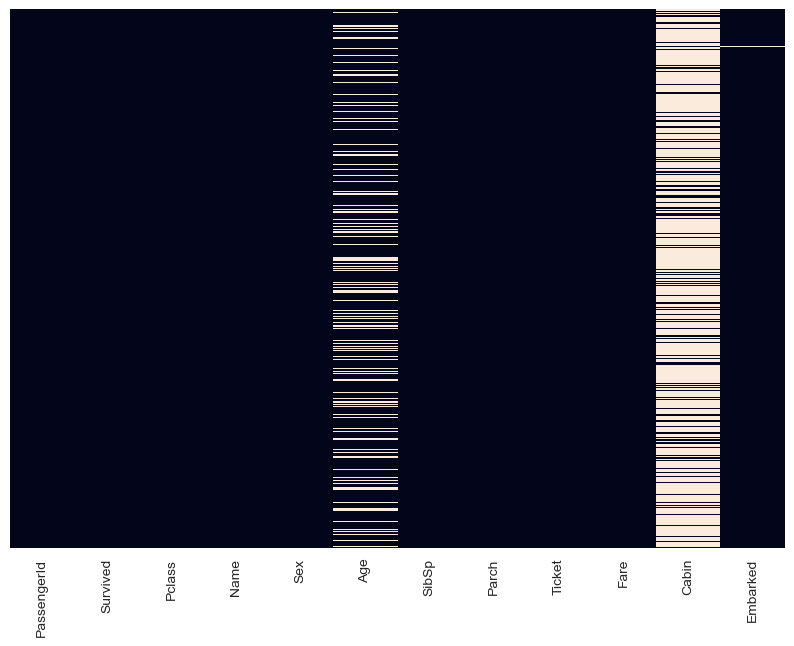

In [182]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

Drop the cabin column since it had soo many missing value and wouldnt have effected the predcitions

In [183]:
titanic.drop(['Cabin'],axis=1,inplace=True)

Droping the two values in embarked column that are missing

In [184]:
titanic['Embarked'].dropna(inplace=True)

Dealing with Age column missing values

In [185]:
def age(columns):
    Age=columns.iloc[0]
    Pclass=columns.iloc[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [186]:
titanic['Age']=titanic[['Age','Pclass']].apply(age,axis=1)

<Axes: >

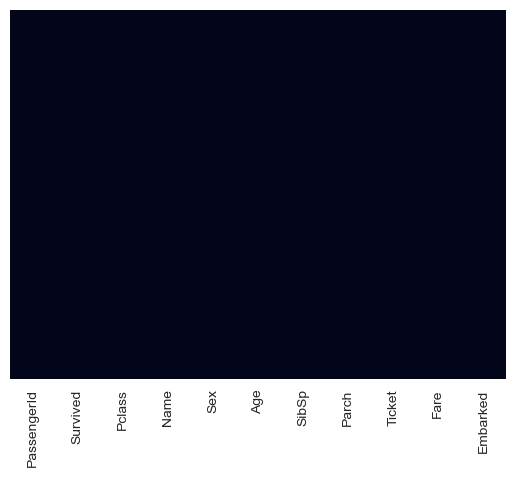

In [187]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

### Exploratory Data Analysis

PLotting distribution of Age

<Figure size 1000x700 with 0 Axes>

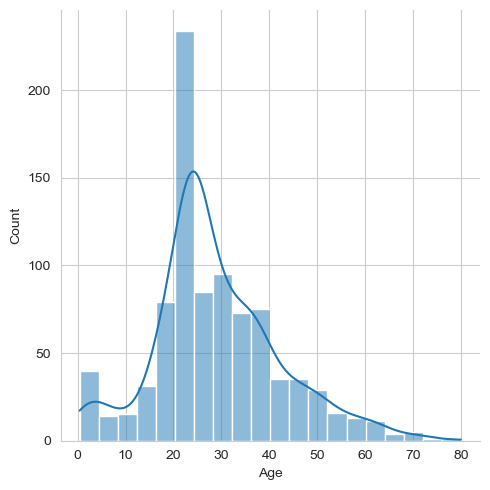

In [188]:
plt.figure(figsize=(10,7))
sns.displot(titanic['Age'],kde=True, bins=20)
plt.show()

Graph of Age vs survived

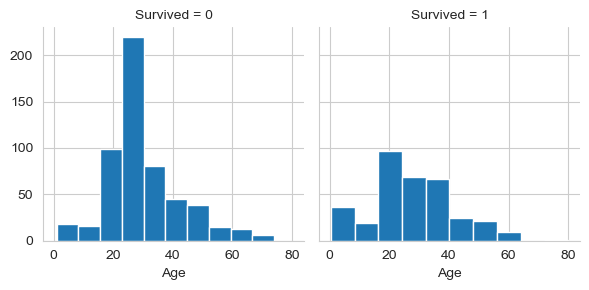

In [189]:
grph=sns.FacetGrid(titanic,col='Survived')
grph.map(plt.hist,'Age')

Graph of Sex vs Survived

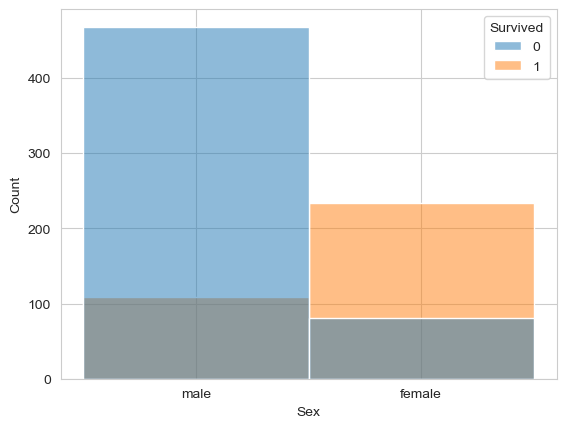

In [190]:
sns.histplot(data=titanic,x='Sex',hue='Survived')
plt.show()

Graph of embarked vs survived

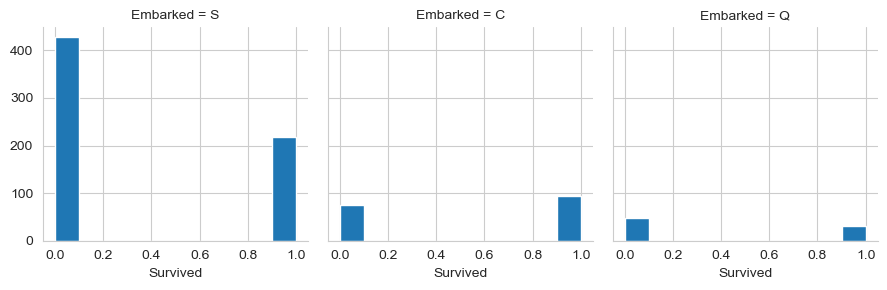

In [191]:
grph=sns.FacetGrid(titanic,col='Embarked')
grph.map(plt.hist,'Survived')
plt.show()

###  Transforming Sex column to fit in model.

In [192]:
titanic['Sex']=pd.get_dummies(titanic['Sex'],drop_first=True,dtype=int)

### Splitting Training and Testing Data

In [193]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [194]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [195]:
X=titanic.drop([ 'Name','Ticket','Embarked','Survived'],axis=1)
y=titanic['Survived']

### Standardizing X features

In [238]:
from sklearn.preprocessing import StandardScaler

In [239]:
sc=StandardScaler()

In [240]:
sc.fit(X)
x_transform=sc.transform(X)

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
X_train,X_test, y_train, y_test = train_test_split(x_transform,y,test_size=0.3,random_state=101)

### KNN Model Training and prediciton

In [244]:
from sklearn.neighbors import KNeighborsClassifier

In [245]:
knn=KNeighborsClassifier(n_neighbors=1)

In [246]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [247]:
knn_predict=knn.predict(X_test)

### Classification Report and Confusion Matrix

In [248]:
from sklearn.metrics import classification_report,confusion_matrix

In [249]:
print('confusion matrix :')
print(confusion_matrix(y_test,knn_predict))
print('\n')
print('classification_report : ',classification_report(y_test,knn_predict))

confusion matrix :
[[130  24]
 [ 38  76]]


classification_report :                precision    recall  f1-score   support

           0       0.77      0.84      0.81       154
           1       0.76      0.67      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



## Predicting Value of K for better Prdictions

In [250]:
error_rate=[]
for i in range(1,40):
    knn_i=KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train,y_train)
    knn_i_predict=knn_i.predict(X_test)
    error_rate.append(np.mean(knn_i_predict != y_test))

Text(0, 0.5, 'Error Rate')

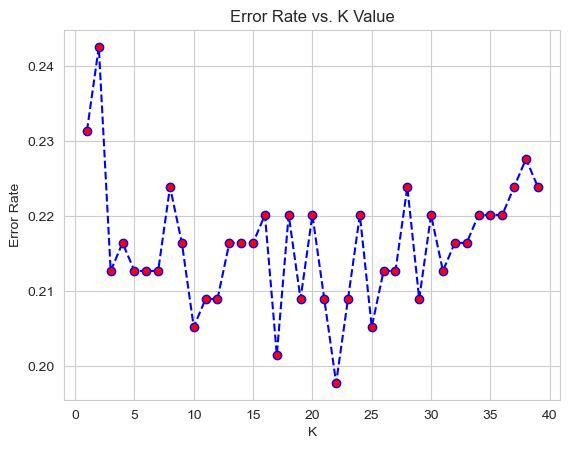

In [251]:
plt.plot(range(1,40),error_rate,ls='--',color='blue',marker='o',markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Lets take value of K as 22 as there is least error rate at this point

In [271]:
knn=KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train,y_train)
knn_predict=knn.predict(X_test)
    

In [272]:
print('confusion matrix :')
print(confusion_matrix(y_test,knn_predict))
print('\n')
print('classification_report : ')
print(classification_report(y_test,knn_predict))

confusion matrix :
[[139  15]
 [ 38  76]]


classification_report : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.84      0.67      0.74       114

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268

